#B2B INVOICE PAYMENT DATE PREDICTION MODEL
**To predict the payment date of the particular invoice with the help of calculated delay**

In [ ]:
import pandas as pd
import numpy as py
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('H2HBABBA2893.csv') #reading the dataset
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH llc,NaN,2020.0,1.930629e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,NaN,7901.99,20200311.0,NAC6,1.930629e+09,1.0
1,U001,0200793568,SUPE corporation,2019-11-29 00:00:00,2019.0,1.930137e+09,2019-11-10,20191111,20191110,20191125.0,USD,RV,1.0,NaN,5397.90,20191110.0,NAA8,1.930137e+09,0.0
2,U001,CCU002,KRFT FDS associates,2019-03-29 00:00:00,2019.0,1.928819e+09,2019-02-21,20190219,20190221,20190328.0,USD,RV,1.0,NaN,35338.14,20190221.0,NAG2,1.928819e+09,0.0
3,U001,0200769623,WAL-MAR corporation,2020-03-03 00:00:00,2020.0,1.930549e+09,2020-02-21,20200220,20200221,20200307.0,USD,RV,1.0,NaN,20517.15,20200221.0,NAH4,1.930549e+09,0.0
4,U001,0200762301,C&S WH foundation,2019-10-09 00:00:00,2019.0,1.929916e+09,2019-09-24,20190924,20190924,20191009.0,USD,RV,1.0,NaN,146475.93,20190924.0,NAC6,1.929916e+09,0.0


**DATA CLEANING**

In [ ]:
df.shape

(13455, 19)

In [ ]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,13455.000000,1.345500e+04,1.345500e+04,1.345500e+04,1.345500e+04,13455.0,0.0,13455.000000,1.345500e+04,1.345400e+04,13454.000000
mean,2019.304051,2.011089e+09,2.019348e+07,2.019351e+07,2.019366e+07,1.0,NaN,32467.801511,2.019202e+07,2.011095e+09,0.198454
std,0.460021,2.760731e+08,4.481616e+03,4.459193e+03,4.461948e+03,0.0,NaN,39970.447636,1.741439e+05,2.760824e+08,0.398851
min,2019.000000,1.928490e+09,2.018123e+07,2.018123e+07,2.019010e+07,1.0,NaN,1.410000,2.010000e+02,1.928490e+09,0.000000
25%,2019.000000,1.929331e+09,2.019050e+07,2.019050e+07,2.019052e+07,1.0,NaN,4785.380000,2.019050e+07,1.929331e+09,0.000000
50%,2019.000000,1.929953e+09,2.019091e+07,2.019091e+07,2.019092e+07,1.0,NaN,17495.030000,2.019091e+07,1.929953e+09,0.000000
75%,2020.000000,1.930620e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47342.115000,2.020013e+07,1.930620e+09,0.000000
max,2020.000000,2.960635e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,792766.350000,2.020052e+07,2.960635e+09,1.000000


In [ ]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13455 entries, 0 to 13454
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           13455 non-null  object 
 1   cust_number             13455 non-null  object 
 2   name_customer           13455 non-null  object 
 3   clear_date              10785 non-null  object 
 4   buisness_year           13455 non-null  float64
 5   doc_id                  13455 non-null  float64
 6   posting_date            13455 non-null  object 
 7   document_create_date    13455 non-null  int64  
 8   document_create_date.1  13455 non-null  int64  
 9   due_in_date             13455 non-null  float64
 10  invoice_currency        13455 non-null  object 
 11  document type           13455 non-null  object 
 12  posting_id              13455 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       13455 non-null

#**DATA PREPROCESSING ON THE MAIN DATASET**


**FINDING THE COUNT OF NULL VALUES of TOTAL DATASET**

In [ ]:
nullv=df.isnull().sum().to_frame(name = 'NULL_COUNTS')
nullv = nullv[nullv['NULL_COUNTS']>0]
null_features = nullv.index
print(nullv)

                    NULL_COUNTS
clear_date                 2670
area_business             13455
cust_payment_terms            1
invoice_id                    1
isOpen                        1


**NULL IMPUTATION**

In [ ]:
df[df.invoice_id.isnull()]#null imputation

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
13454,U001,0200729942,SA,2019-07-30 00:00:00,2019.0,1.929625e+09,2019-07-16,20190716,20190716,20190731.0,USD,RV,1.0,NaN,1555.42,201.0,NaN,NaN,NaN


In [ ]:
df=df[df.invoice_id.isnull()==False]#dropping the record containing NULL value

**DROPPING THE AREA_BUSINESS COLUMN & BASELINE_CREATE_DATE**

In [ ]:
df.drop('area_business',axis=1,inplace = True)
df.drop('baseline_create_date',axis=1,inplace = True)


df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH llc,NaN,2020.0,1.930629e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,7901.99,NAC6,1.930629e+09,1.0
1,U001,0200793568,SUPE corporation,2019-11-29 00:00:00,2019.0,1.930137e+09,2019-11-10,20191111,20191110,20191125.0,USD,RV,1.0,5397.90,NAA8,1.930137e+09,0.0
2,U001,CCU002,KRFT FDS associates,2019-03-29 00:00:00,2019.0,1.928819e+09,2019-02-21,20190219,20190221,20190328.0,USD,RV,1.0,35338.14,NAG2,1.928819e+09,0.0
3,U001,0200769623,WAL-MAR corporation,2020-03-03 00:00:00,2020.0,1.930549e+09,2020-02-21,20200220,20200221,20200307.0,USD,RV,1.0,20517.15,NAH4,1.930549e+09,0.0
4,U001,0200762301,C&S WH foundation,2019-10-09 00:00:00,2019.0,1.929916e+09,2019-09-24,20190924,20190924,20191009.0,USD,RV,1.0,146475.93,NAC6,1.929916e+09,0.0


#DIVIDING DATASET INTO TRAINED AND TEST DATA BASED ON NULL VALUES OF CLEAR_DATE

In [ ]:
test_dataset = df[df['clear_date'].isnull()]#test_dataset have the rows that have clear_date=NULL & df have the rows that have clear_date!=NULL
df=df.dropna()
test_dataset.shape
df.shape

(10784, 17)

CHECKING FOR THE NUMBER OF NULL VALUES IN BOTH DATASET

In [ ]:
test_dataset.isna().sum() #checked for null values in test_datset

business_code                0
cust_number                  0
name_customer                0
clear_date                2670
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

In [ ]:
df.isna().sum() #checked for null values in df

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

#SORTING USING POSTING_DATE

In [ ]:
df.sort_values(by=['posting_date'], inplace=True)#ascending
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,cust_payment_terms,invoice_id,isOpen
6489,U001,0200769623,WAL-MAR co,2019-01-10 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,52196.68,NAH4,1.928543e+09,0.0
1012,U001,0200769623,WAL-MAR us,2019-01-09 00:00:00,2019.0,1.928544e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,23589.38,NAH4,1.928544e+09,0.0
13305,U001,0200769623,WAL-MAR in,2019-01-09 00:00:00,2019.0,1.928538e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,16263.71,NAH4,1.928538e+09,0.0
6207,U001,0200759878,SA us,2019-01-15 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,16035.11,NAH4,1.928541e+09,0.0
2349,U001,0200769623,WAL-MAR us,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,1433.67,NAH4,1.928541e+09,0.0


**DATE-TIME CONVERSION**

In [ ]:
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
#df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['clear_date']=pd.to_datetime(df['clear_date'],)
df['posting_date']=pd.to_datetime(df['posting_date'])



 


#CONSTANT/DUPLICATE REMOVAL

**FINDING UNIQUE VALUES IN ROWS**

In [ ]:
df.nunique()

business_code                 5
cust_number                 828
name_customer              2130
clear_date                  355
buisness_year                 2
doc_id                    10718
posting_date                420
document_create_date        425
document_create_date.1      420
due_in_date                 470
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         10196
cust_payment_terms           58
invoice_id                10718
isOpen                        1
dtype: int64

In [ ]:
#uniqueness in categorical columns
for col in df.columns: 
    if df[col].nunique()<= 6:
        print(df[col].value_counts())
        print('#########################')

U001    9743
CA02     857
U013     140
U002      41
U005       3
Name: business_code, dtype: int64
#########################
2019.0    9363
2020.0    1421
Name: buisness_year, dtype: int64
#########################
USD    9926
CAD     858
Name: invoice_currency, dtype: int64
#########################
RV    10784
Name: document type, dtype: int64
#########################
1.0    10784
Name: posting_id, dtype: int64
#########################
0.0    10784
Name: isOpen, dtype: int64
#########################


**FILTERING_OUT CONSTANT FEATURES**

In [ ]:
const_feature = []
uniq_val_count = []
unique_cols = dict()
for col in list(df.columns):
    uniq_val_count.append(df[col].nunique())
    if(df[col].nunique()==1):
        const_feature.append(col)
    
print('\n\n\nConstant Features are   :',const_feature)
print('\n\nALL FEATURES WITH UNIQUE VALUES : \n')
pd.DataFrame({'COLUMN NAMES':list(df.columns) ,'UNIQUE VALUES COUNT':uniq_val_count})

# Removing the constant feature
df=df.drop(columns=const_feature)




Constant Features are   : ['document type', 'posting_id', 'isOpen']


ALL FEATURES WITH UNIQUE VALUES : 



**CREATING TARGET COLUMN-DELAY**

In [ ]:

df['delay'] = df.loc[:, 'clear_date'] - df.loc[:, 'due_in_date']
df['delay']=df['delay'].dt.days
df.shape

(10784, 15)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 6489 to 13173
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10784 non-null  object        
 1   cust_number             10784 non-null  object        
 2   name_customer           10784 non-null  object        
 3   clear_date              10784 non-null  datetime64[ns]
 4   buisness_year           10784 non-null  float64       
 5   doc_id                  10784 non-null  float64       
 6   posting_date            10784 non-null  datetime64[ns]
 7   document_create_date    10784 non-null  datetime64[ns]
 8   document_create_date.1  10784 non-null  datetime64[ns]
 9   due_in_date             10784 non-null  datetime64[ns]
 10  invoice_currency        10784 non-null  object        
 11  total_open_amount       10784 non-null  float64       
 12  cust_payment_terms      10784 non-null  obj

#LEVEL ENCODING FOR CATEOGRICAL VALUES 'buisness_year','cust_number','name_customer','business_code','cust_payment_terms','invoice_currency'

In [ ]:
class LabelEncoderExt(object):# a class is coded that consisting of fit,transform functions fro encoding
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in py.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [ ]:
list_cust_details = ['buisness_year','cust_number','name_customer','business_code','cust_payment_terms','invoice_currency']#calling the list that consisting of all the object values to convert to int

label_enc_list = dict()
for col in range(len(list_cust_details)):
    label_encoder = LabelEncoderExt()
    label_encoder.fit(df[list_cust_details[col]])
    df[list_cust_details[col]] = label_encoder.transform(df[list_cust_details[col]])
    label_enc_list[list_cust_details[col]]=label_encoder

In [ ]:
for col in range(len(list_cust_details)): # using the same for test_dataset
    test_dataset[list_cust_details[col]] = label_enc_list[list_cust_details[col]].transform(test_dataset[list_cust_details[col]])

In [ ]:
for col in list_cust_details:                                     #printing the unique values with encoded values
    print(col,"   :     \n",df[col].unique(),"   \n     \n")

buisness_year    :     
 [2]    
     

cust_number    :     
 [520 502 451 480 341 484 316 417 214 320 178 596 827 421 464 334 418 624
 526 236 272 278 590 507 582 308 229 498 621 505  14 182 196 559 610 331
 467 633 564 493 468 819 415 349 824 246 536 195 323 416 524  71 193 194
 424 628 333 174 213 525 312 309 573 458 579 544 825 211 340 430 327 457
 491 405 504 589 156 414 594 351 519 376 580 281 382 483 807  89 543 220
 620 293 445   5 642 575  83  86 542 476 428 438 541 518 471  56 280 419
 386 413 583 168 587 186  70 452 255 586 104 191 549 225 366  88 618 134
 254 513  48 704 527 612 749 752 273 461 475 321 574 826 722 304 801 757
 210 447 439 534 576 614 427 547 554 345 313   3 275 786  50  12  58 821
 243 290 407  40 175  17 488 354 584 616 560 112 205 395 726 360  79 763
 479 364 444 745 551 157 758 688 314 325 450 455 777 606  42 353 532 634
 404 762 258 401 125 622 511 683 368 362 570 477 338 499 346 671 719 566
 808 432 721 296 755 663 261 200 809 781 263 795 301  19 111 

In [ ]:
df=df.drop(['clear_date'],axis=1)#dropping the clear_date for training the model

#SPLIT DATA

In [ ]:
#Converting the df into X and y to pass on train_test_split function
X=df.drop(['delay'],axis=1)# dataframe without the target column
y=df['delay']


**TEST AND TRAIN**

In [ ]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)


**TEST AND VALIDATE**

In [ ]:
#splitting the test part into 2 parts --doing a 15:15 split 
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)


In [ ]:
X_train.shape,X_val.shape,X_test.shape

((7548, 13), (1618, 13), (1618, 13))

**EXPLORATORY DATA ANALYSIS**

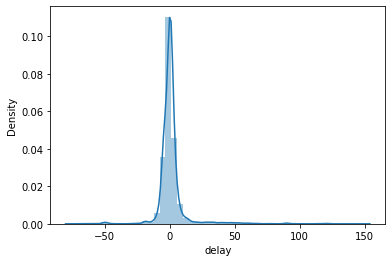

In [ ]:
sns.distplot(df.delay)#distribution of target column
plt.show()

In [ ]:
X_train.merge(y_train,on = X_train.index)#merging with delay column

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,delay
0,6489,1,520,2064,2,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,52196.68,29,1.928543e+09,-4
1,1012,1,520,2072,2,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,23589.38,29,1.928544e+09,-5
2,13305,1,520,2068,2,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,16263.71,29,1.928538e+09,-5
3,6207,1,502,1618,2,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,16035.11,29,1.928541e+09,1
4,2349,1,520,2072,2,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,1433.67,29,1.928541e+09,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543,13364,1,520,2072,2,1.929972e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,1,16252.94,29,1.929972e+09,-1
7544,3685,1,543,1280,2,1.929976e+09,2019-10-07,2019-10-07,2019-10-07,2019-10-22,1,70102.05,16,1.929976e+09,0
7545,1439,1,480,1917,2,1.929974e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,1,47056.20,16,1.929974e+09,6
7546,9927,1,397,855,2,1.929973e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,1,56902.51,16,1.929973e+09,0


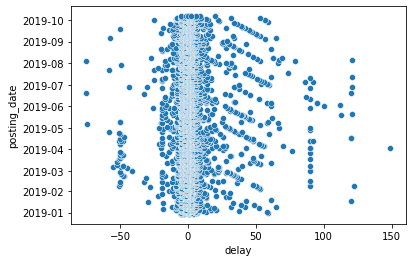

In [ ]:
#in the scatter plot below,delay is plotted aganist the posting_date
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="posting_date") 

**FEATURE ENG**

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7548 entries, 6489 to 2589
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           7548 non-null   int64         
 1   cust_number             7548 non-null   int64         
 2   name_customer           7548 non-null   int64         
 3   buisness_year           7548 non-null   int64         
 4   doc_id                  7548 non-null   float64       
 5   posting_date            7548 non-null   datetime64[ns]
 6   document_create_date    7548 non-null   datetime64[ns]
 7   document_create_date.1  7548 non-null   datetime64[ns]
 8   due_in_date             7548 non-null   datetime64[ns]
 9   invoice_currency        7548 non-null   int64         
 10  total_open_amount       7548 non-null   float64       
 11  cust_payment_terms      7548 non-null   int64         
 12  invoice_id              7548 non-null   float

In [ ]:
df

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,delay
6489,1,520,2064,2,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,52196.68,29,1.928543e+09,-4
1012,1,520,2072,2,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,23589.38,29,1.928544e+09,-5
13305,1,520,2068,2,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,16263.71,29,1.928538e+09,-5
6207,1,502,1618,2,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,16035.11,29,1.928541e+09,1
2349,1,520,2072,2,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,1433.67,29,1.928541e+09,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13089,1,505,304,2,1.930566e+09,2020-02-26,2020-02-25,2020-02-26,2020-03-12,1,1535.38,21,1.930566e+09,0
4049,1,278,552,2,1.930567e+09,2020-02-26,2020-02-25,2020-02-26,2020-03-12,1,15428.16,16,1.930567e+09,0
5012,1,525,1620,2,1.930556e+09,2020-02-26,2020-02-21,2020-02-26,2020-03-12,1,80759.41,16,1.930556e+09,4
10813,1,334,77,2,1.930561e+09,2020-02-26,2020-02-24,2020-02-26,2020-03-12,1,59422.85,16,1.930561e+09,0


**LABEL ENCODING FOR DATES**

In [ ]:
#encoding due_in_date by splitting into day_of_week,day,month,year
X_train['day_of_week_due'] = X_train['due_in_date'].dt.weekday 
X_val['day_of_week_due'] = X_val['due_in_date'].dt.weekday 
X_test['day_of_week_due'] = X_test['due_in_date'].dt.weekday

X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year

X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

In [ ]:
#encoding document_create_date.1 by splitting into day_of_week,day,month,year
X_train['day_of_week_document_create_date.1'] = X_train['document_create_date.1'].dt.weekday 
X_val['day_of_week_document_create_date.1'] = X_val['document_create_date.1'].dt.weekday 
X_test['day_of_week_document_create_date.1'] = X_test['document_create_date.1'].dt.weekday
#to get day,month,year
X_train['day_of_document_create_date.1'] = X_train['document_create_date.1'].dt.day
X_train['month_of_document_create_date.1'] = X_train['document_create_date.1'].dt.month
X_train['year_of_document_create_date.1'] = X_train['document_create_date.1'].dt.year

X_val['day_of_document_create_date.1'] = X_val['document_create_date.1'].dt.day
X_val['month_of_document_create_date.1'] = X_val['document_create_date.1'].dt.month
X_val['year_of_document_create_date.1'] = X_val['document_create_date.1'].dt.year

X_test['day_of_document_create_date.1'] = X_test['document_create_date.1'].dt.day
X_test['month_of_document_create_date.1'] = X_test['document_create_date.1'].dt.month
X_test['year_of_document_create_date.1'] = X_test['document_create_date.1'].dt.year

In [ ]:
#encoding posting_date by splitting into day_of_week,day,month,year

X_train['day_of_week'] = X_train['posting_date'].dt.weekday 
X_val['day_of_week'] = X_val['posting_date'].dt.weekday 
X_test['day_of_week'] = X_test['posting_date'].dt.weekday
#to get day,month,year
X_train['day_of_posting_date'] = X_train['posting_date'].dt.day
X_train['month_of_posting_date'] = X_train['posting_date'].dt.month
X_train['year_of_posting_date'] = X_train['posting_date'].dt.year

X_val['day_of_posting_date'] = X_val['posting_date'].dt.day
X_val['month_of_posting_date'] = X_val['posting_date'].dt.month
X_val['year_of_posting_date'] = X_val['posting_date'].dt.year

X_test['day_of_posting_date'] = X_test['posting_date'].dt.day
X_test['month_of_posting_date'] = X_test['posting_date'].dt.month
X_test['year_of_posting_date'] = X_test['posting_date'].dt.year

In [ ]:
#encoding document_create_date by splitting into day_of_week,day,month,year

X_train['day_of_week_document_create_date'] = X_train['document_create_date'].dt.weekday 
X_val['day_of_week_document_create_date'] = X_val['document_create_date'].dt.weekday 
X_test['day_of_week_document_create_date'] = X_test['document_create_date'].dt.weekday
#to get day,month,year
X_train['day_of_document_create_date'] = X_train['document_create_date'].dt.day
X_train['month_of_document_create_date'] = X_train['document_create_date'].dt.month
X_train['year_of_document_create_date_date'] = X_train['posting_date'].dt.year

X_val['day_of_document_create_date'] = X_val['document_create_date'].dt.day
X_val['month_of_document_create_date'] = X_val['document_create_date'].dt.month
X_val['year_of_document_create_date'] = X_val['document_create_date'].dt.year

X_test['day_of_document_create_date'] = X_test['document_create_date'].dt.day
X_test['month_of_document_create_date'] = X_test['document_create_date'].dt.month
X_test['year_of_document_create_date'] = X_test['document_create_date'].dt.year

In [ ]:
# function will delete a column from train , val and test
def drop_col(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [ ]:
# wrote a custom function to do a status check  on all the dataframes 
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())

In [ ]:
X_train ,X_val, X_test = drop_col(['due_in_date'])
X_train ,X_val, X_test = drop_col(['document_create_date.1'])
X_train ,X_val, X_test = drop_col(['posting_date'])
X_train ,X_val, X_test = drop_col(['document_create_date'])



In [ ]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,day_of_week_due,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date,day_of_week_document_create_date.1,day_of_document_create_date.1,month_of_document_create_date.1,year_of_document_create_date.1,day_of_week,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_week_document_create_date,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date_date
6489,1,520,2064,2,1.928543e+09,1,52196.68,29,1.928543e+09,0,14,1,2019,6,30,12,2018,6,30,12,2018,6,30,12,2018
1012,1,520,2072,2,1.928544e+09,1,23589.38,29,1.928544e+09,0,14,1,2019,6,30,12,2018,6,30,12,2018,6,30,12,2018
13305,1,520,2068,2,1.928538e+09,1,16263.71,29,1.928538e+09,0,14,1,2019,6,30,12,2018,6,30,12,2018,5,29,12,2018
6207,1,502,1618,2,1.928541e+09,1,16035.11,29,1.928541e+09,0,14,1,2019,6,30,12,2018,6,30,12,2018,5,29,12,2018
2349,1,520,2072,2,1.928541e+09,1,1433.67,29,1.928541e+09,0,14,1,2019,6,30,12,2018,6,30,12,2018,5,29,12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364,1,520,2072,2,1.929972e+09,1,16252.94,29,1.929972e+09,1,22,10,2019,0,7,10,2019,0,7,10,2019,5,5,10,2019
3685,1,543,1280,2,1.929976e+09,1,70102.05,16,1.929976e+09,1,22,10,2019,0,7,10,2019,0,7,10,2019,0,7,10,2019
1439,1,480,1917,2,1.929974e+09,1,47056.20,16,1.929974e+09,1,22,10,2019,0,7,10,2019,0,7,10,2019,5,5,10,2019
9927,1,397,855,2,1.929973e+09,1,56902.51,16,1.929973e+09,1,22,10,2019,0,7,10,2019,0,7,10,2019,5,5,10,2019


In [ ]:
X_train.info()#coverted all the values into float/int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7548 entries, 6489 to 2589
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   business_code                       7548 non-null   int64  
 1   cust_number                         7548 non-null   int64  
 2   name_customer                       7548 non-null   int64  
 3   buisness_year                       7548 non-null   int64  
 4   doc_id                              7548 non-null   float64
 5   invoice_currency                    7548 non-null   int64  
 6   total_open_amount                   7548 non-null   float64
 7   cust_payment_terms                  7548 non-null   int64  
 8   invoice_id                          7548 non-null   float64
 9   day_of_week_due                     7548 non-null   int64  
 10  day_of_due_in_date                  7548 non-null   int64  
 11  month_of_due_in_date                7548

**FEATURE SELECTION**

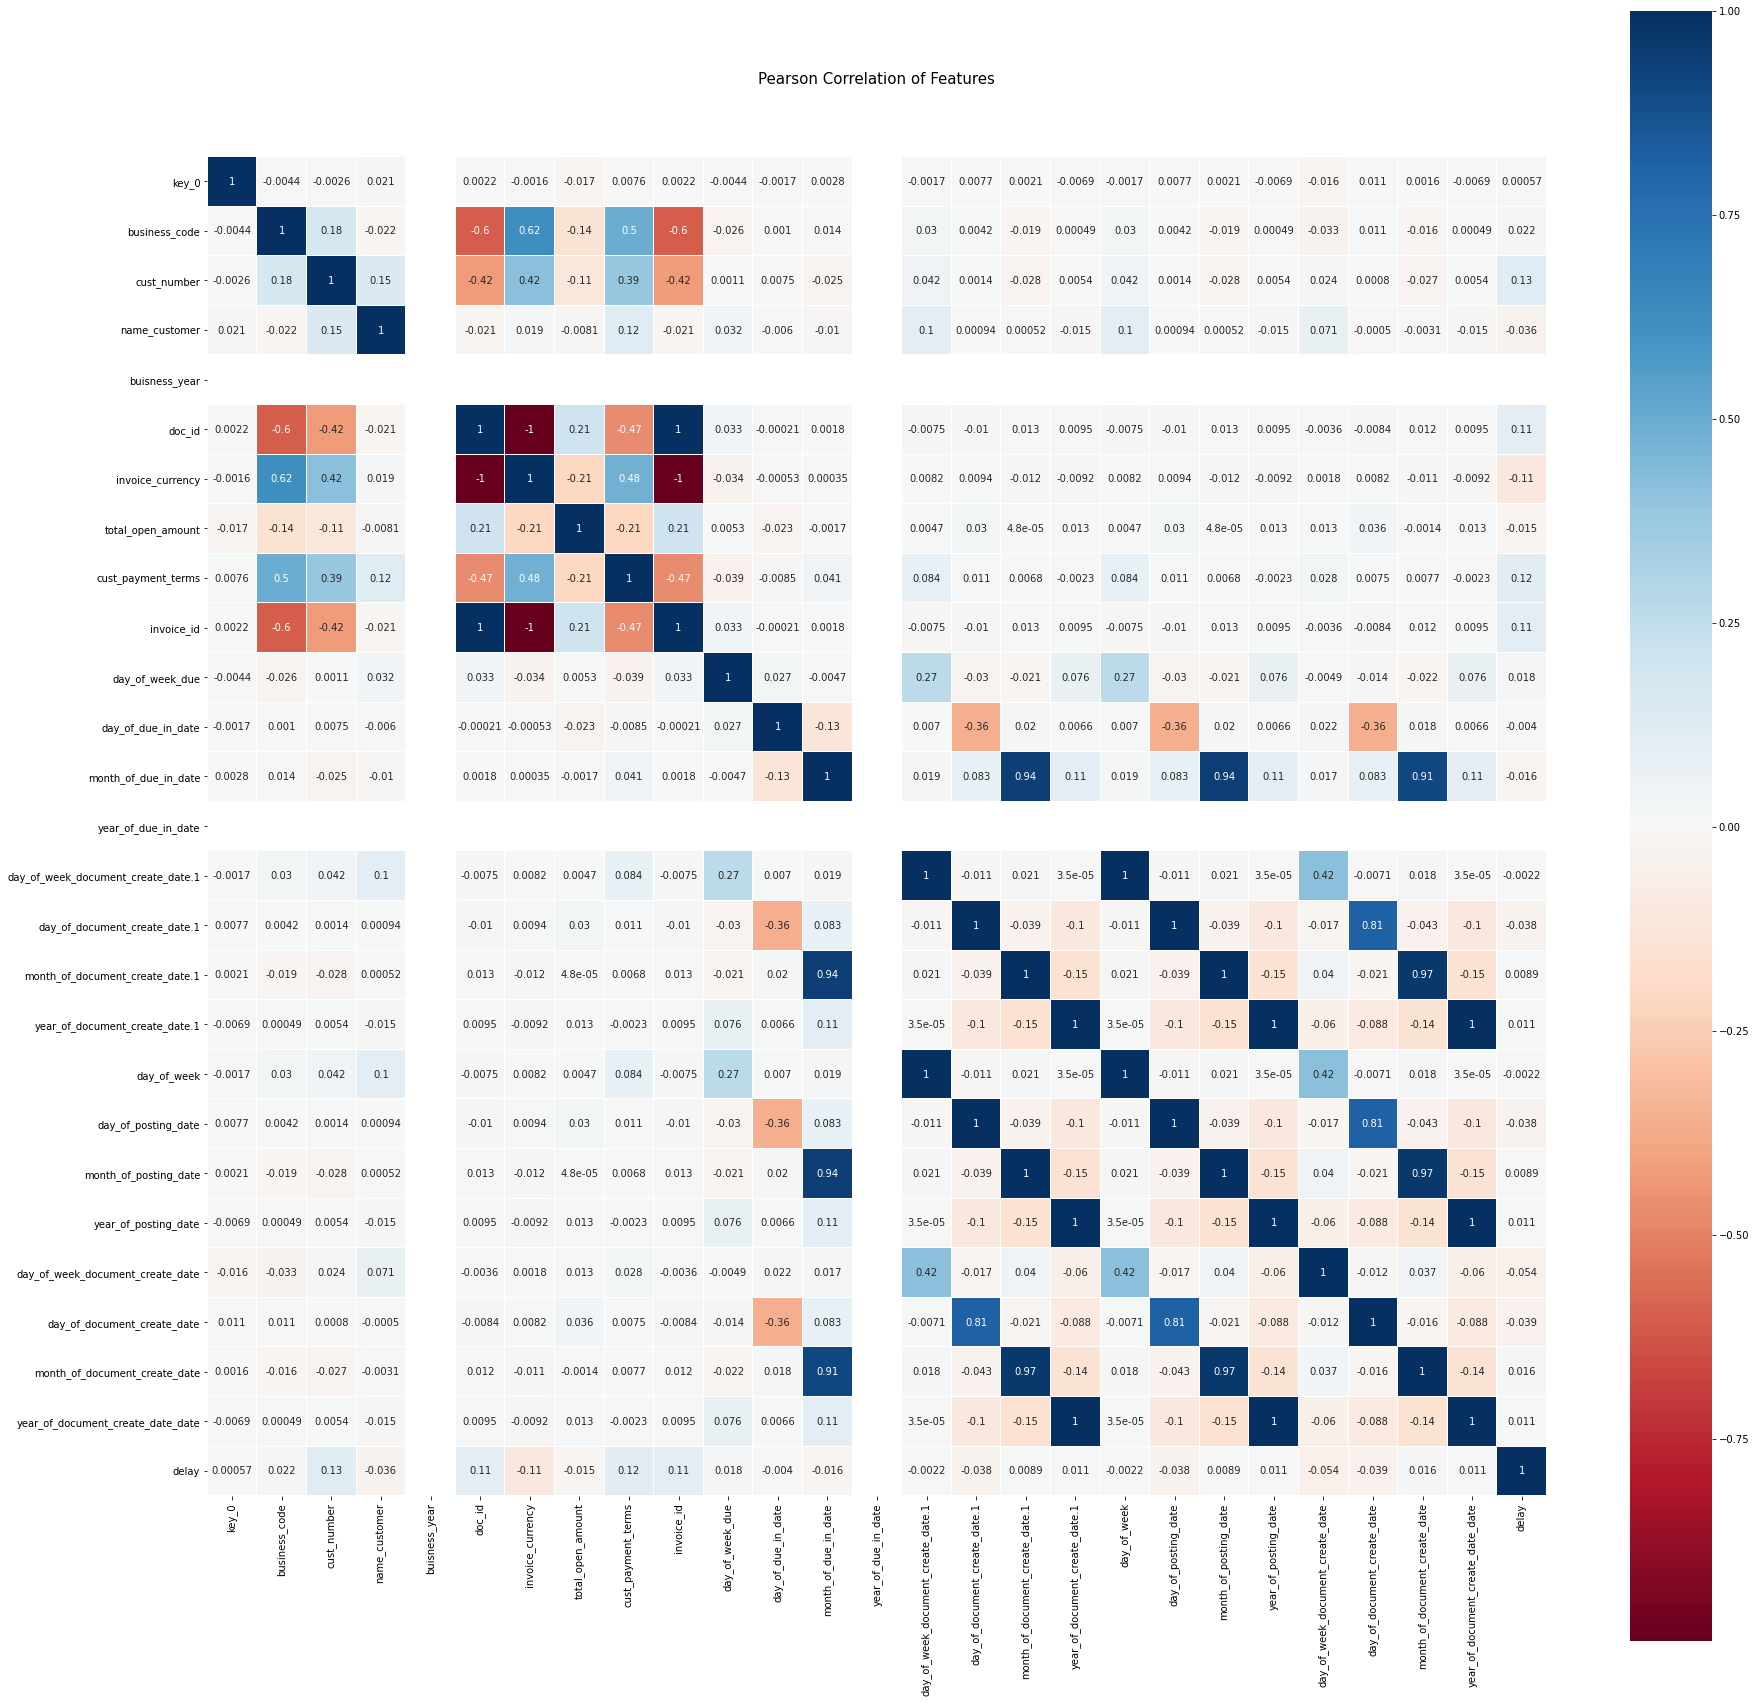

In [ ]:
#data visulaization by heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# also since all the columns have been converted to int/ float , you can use variance threshold -- ;-
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [ ]:

sel.variances_

array([2.02382968e-01, 2.83983732e+04, 5.04852889e+05, 0.00000000e+00,
       7.62866000e+16, 7.19446242e-02, 1.65991954e+09, 1.11854274e+02,
       7.62866000e+16, 3.53908587e+00, 7.44330534e+01, 7.04906946e+00,
       0.00000000e+00, 3.30480368e+00, 7.81739844e+01, 6.93190790e+00,
       3.56431083e-03, 3.30480368e+00, 7.81739844e+01, 6.93190790e+00,
       3.56431083e-03, 3.30255227e+00, 7.81403084e+01, 6.99683613e+00,
       3.56431083e-03])

In [ ]:
X_train,X_val ,X_test = drop_col(['buisness_year'])#since from the heatmap,buisness year is constant

In [ ]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7548 entries, 6489 to 2589
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   business_code                       7548 non-null   int64  
 1   cust_number                         7548 non-null   int64  
 2   name_customer                       7548 non-null   int64  
 3   doc_id                              7548 non-null   float64
 4   invoice_currency                    7548 non-null   int64  
 5   total_open_amount                   7548 non-null   float64
 6   cust_payment_terms                  7548 non-null   int64  
 7   invoice_id                          7548 non-null   float64
 8   day_of_week_due                     7548 non-null   int64  
 9   day_of_due_in_date                  7548 non-null   int64  
 10  month_of_due_in_date                7548 non-null   int64  
 11  year_of_due_in_date                 7548

#MODELLING

**BASE MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = base_model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

8.340853749990163

In [ ]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7548 entries, 6489 to 2589
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   business_code                       7548 non-null   int64  
 1   cust_number                         7548 non-null   int64  
 2   name_customer                       7548 non-null   int64  
 3   doc_id                              7548 non-null   float64
 4   invoice_currency                    7548 non-null   int64  
 5   total_open_amount                   7548 non-null   float64
 6   cust_payment_terms                  7548 non-null   int64  
 7   invoice_id                          7548 non-null   float64
 8   day_of_week_due                     7548 non-null   int64  
 9   day_of_due_in_date                  7548 non-null   int64  
 10  month_of_due_in_date                7548 non-null   int64  
 11  year_of_due_in_date                 7548

In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 7271 to 4270
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   business_code                       1618 non-null   int64  
 1   cust_number                         1618 non-null   int64  
 2   name_customer                       1618 non-null   int64  
 3   doc_id                              1618 non-null   float64
 4   invoice_currency                    1618 non-null   int64  
 5   total_open_amount                   1618 non-null   float64
 6   cust_payment_terms                  1618 non-null   int64  
 7   invoice_id                          1618 non-null   float64
 8   day_of_week_due                     1618 non-null   int64  
 9   day_of_due_in_date                  1618 non-null   int64  
 10  month_of_due_in_date                1618 non-null   int64  
 11  year_of_due_in_date                 1618

In [ ]:
X_val = X_val.rename(columns={"year_of_document_create_date": "year_of_document_create_date_date"})
X_test = X_test.rename(columns={"year_of_document_create_date": "year_of_document_create_date_date"})

**TREE BASED MODEL**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
regressor = DecisionTreeRegressor(random_state=42 , max_depth=5, min_samples_split=3)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_predict2 = regressor.predict(X_val)

In [ ]:
mean_squared_error(y_val, y_predict2, squared=False)

5.85370077461762

In [ ]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

7.337345401373267

**XGBOOST MODEL**

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(learning_rate=0.09,random_state=42,objective='reg:squarederror')
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.09, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred1 = xgb_model.predict(X_val)
mean_squared_error(y_val, y_pred1, squared=False)

5.6783479052855546

In [ ]:
y_pred1 = xgb_model.predict(X_test)
mean_squared_error(y_val, y_pred1, squared=False)

9.38906100102032

**RANDOMFOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred1 = regr.predict(X_val)
mean_squared_error(y_val, y_pred1, squared=False)

6.421875022218112

In [ ]:
y_pred1 = regr.predict(X_test)
mean_squared_error(y_test, y_pred1, squared=False)

7.978680457430286

#WORKING WITH THE TEST_DATASET

1.PREPROCESSING 
2.DROPPING CLEAR_DATE COL
3.ENCODERS TO MAP 

In [ ]:
test_dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,cust_payment_terms,invoice_id,isOpen
0,1,505,308,NaN,2,1.930629e+09,2020-03-11,20200310,20200311,20200326.0,1,RV,1.0,7901.99,21,1.930629e+09,1.0
6,1,520,2062,NaN,2,1.930710e+09,2020-03-28,20200327,20200328,20200412.0,1,RV,1.0,20271.96,29,1.930710e+09,1.0
16,1,520,2070,NaN,2,1.930604e+09,2020-03-06,20200304,20200306,20200321.0,1,RV,1.0,9731.38,29,1.930604e+09,1.0
21,1,505,303,NaN,2,1.930701e+09,2020-03-25,20200325,20200325,20200409.0,1,RV,1.0,72568.88,21,1.930701e+09,1.0
22,1,520,2070,NaN,2,1.930699e+09,2020-03-25,20200325,20200325,20200409.0,1,RV,1.0,20459.51,29,1.930699e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13404,1,520,2066,NaN,2,1.930818e+09,2020-04-23,20200423,20200423,20200508.0,1,RV,1.0,1717.34,29,1.930818e+09,1.0
13423,1,480,1921,NaN,2,1.930716e+09,2020-03-27,20200328,20200327,20200411.0,1,RV,1.0,33515.14,16,1.930716e+09,1.0
13426,0,236,2056,NaN,2,2.960622e+09,2020-03-21,20200321,20200321,20200331.0,0,RV,1.0,12918.11,4,2.960622e+09,1.0
13431,1,278,551,NaN,2,1.930709e+09,2020-03-26,20200326,20200326,20200410.0,1,RV,1.0,10454.77,16,1.930709e+09,1.0


**NULL/CONSTANT/DUPLICATE**

In [ ]:
test_dataset.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                2670
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

**DROPPING CONSTANT FEATURES**

In [ ]:
const_feature = []
uniq_val_count = []
unique_cols = dict()
for col in list(test_dataset.columns):
    uniq_val_count.append(test_dataset[col].nunique())
    if(test_dataset[col].nunique()==1):
        const_feature.append(col)
    
print('\n\n\nConstant Features are   :',const_feature)
print('\n\nALL FEATURES WITH UNIQUE VALUES : \n')
pd.DataFrame({'COLUMN NAMES':list(test_dataset.columns) ,'UNIQUE VALUES COUNT':uniq_val_count})

# Removing the constant feature
test_dataset=test_dataset.drop(columns=const_feature)




Constant Features are   : ['buisness_year', 'document type', 'posting_id', 'isOpen']


ALL FEATURES WITH UNIQUE VALUES : 



In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 13444
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           2670 non-null   int64  
 1   cust_number             2670 non-null   int64  
 2   name_customer           2670 non-null   int64  
 3   clear_date              0 non-null      object 
 4   doc_id                  2670 non-null   float64
 5   posting_date            2670 non-null   object 
 6   document_create_date    2670 non-null   int64  
 7   document_create_date.1  2670 non-null   int64  
 8   due_in_date             2670 non-null   float64
 9   invoice_currency        2670 non-null   int64  
 10  total_open_amount       2670 non-null   float64
 11  cust_payment_terms      2670 non-null   int64  
 12  invoice_id              2670 non-null   float64
dtypes: float64(4), int64(7), object(2)
memory usage: 292.0+ KB


In [ ]:
X_test_dataset = test_dataset.drop(['clear_date'],axis=1)#drop clear_date to predict it
X_test_dataset

#  DROP clear_date FROM MAIN TEST ITSELF
test_dataset.drop(['clear_date'], inplace =True,axis=1)

In [ ]:
X_test_dataset['posting_date']=pd.to_datetime(test_dataset['posting_date'])
X_test_dataset['due_in_date']=pd.to_datetime(test_dataset['due_in_date'],format='%Y%m%d')
X_test_dataset['document_create_date']=pd.to_datetime(test_dataset['document_create_date'],format='%Y%m%d')
X_test_dataset['document_create_date.1']=pd.to_datetime(test_dataset['document_create_date.1'],format='%Y%m%d')

In [ ]:
test_dataset

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
0,1,505,308,1.930629e+09,2020-03-11,20200310,20200311,20200326.0,1,7901.99,21,1.930629e+09
6,1,520,2062,1.930710e+09,2020-03-28,20200327,20200328,20200412.0,1,20271.96,29,1.930710e+09
16,1,520,2070,1.930604e+09,2020-03-06,20200304,20200306,20200321.0,1,9731.38,29,1.930604e+09
21,1,505,303,1.930701e+09,2020-03-25,20200325,20200325,20200409.0,1,72568.88,21,1.930701e+09
22,1,520,2070,1.930699e+09,2020-03-25,20200325,20200325,20200409.0,1,20459.51,29,1.930699e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
13404,1,520,2066,1.930818e+09,2020-04-23,20200423,20200423,20200508.0,1,1717.34,29,1.930818e+09
13423,1,480,1921,1.930716e+09,2020-03-27,20200328,20200327,20200411.0,1,33515.14,16,1.930716e+09
13426,0,236,2056,2.960622e+09,2020-03-21,20200321,20200321,20200331.0,0,12918.11,4,2.960622e+09
13431,1,278,551,1.930709e+09,2020-03-26,20200326,20200326,20200410.0,1,10454.77,16,1.930709e+09


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 13444
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           2670 non-null   int64  
 1   cust_number             2670 non-null   int64  
 2   name_customer           2670 non-null   int64  
 3   doc_id                  2670 non-null   float64
 4   posting_date            2670 non-null   object 
 5   document_create_date    2670 non-null   int64  
 6   document_create_date.1  2670 non-null   int64  
 7   due_in_date             2670 non-null   float64
 8   invoice_currency        2670 non-null   int64  
 9   total_open_amount       2670 non-null   float64
 10  cust_payment_terms      2670 non-null   int64  
 11  invoice_id              2670 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 271.2+ KB


**LABEL ENCODING FOR TEST_DATASET DATES**

In [ ]:
#due_in_date
X_test_dataset['day_of_week_due_date'] = X_test_dataset['due_in_date'].dt.weekday 
X_test_dataset['day_of_due_date'] = X_test_dataset['due_in_date'].dt.day
X_test_dataset['month_of_due_date'] = X_test_dataset['due_in_date'].dt.month
X_test_dataset['year_of_due_date'] = X_test_dataset['due_in_date'].dt.year

In [ ]:
#posting_date
X_test_dataset['day_of_week_posting_date'] = X_test_dataset['posting_date'].dt.weekday 
X_test_dataset['day_of_posting_date'] = X_test_dataset['posting_date'].dt.day
X_test_dataset['month_of_posting_date'] = X_test_dataset['posting_date'].dt.month
X_test_dataset['year_of_posting_date'] = X_test_dataset['posting_date'].dt.year

In [ ]:
#document_create_date
X_test_dataset['day_of_week_document_create_date'] = X_test_dataset['document_create_date'].dt.weekday 
X_test_dataset['day_of_document_create_date'] = X_test_dataset['document_create_date'].dt.day
X_test_dataset['month_of_document_create_date'] = X_test_dataset['document_create_date'].dt.month
X_test_dataset['year_of_document_create_date'] = X_test_dataset['document_create_date'].dt.year

In [ ]:
#document_creat_date.1
X_test_dataset['day_of_week_document_create_date.1'] = X_test_dataset['document_create_date.1'].dt.weekday 
X_test_dataset['day_of_document_create_date.1'] = X_test_dataset['document_create_date.1'].dt.day
X_test_dataset['month_of_document_create_date.1'] = X_test_dataset['document_create_date.1'].dt.month
X_test_dataset['year_of_document_create_date.1'] = X_test_dataset['document_create_date.1'].dt.year

In [ ]:
X_test_dataset.drop(['due_in_date'],inplace =True ,axis=1)
X_test_dataset.drop(['posting_date'],inplace =True ,axis=1)
X_test_dataset.drop(['document_create_date'],inplace =True ,axis=1)
X_test_dataset.drop(['document_create_date.1'],inplace =True ,axis=1)

In [ ]:
X_test_dataset.info()#converted the col into int/float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 13444
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   business_code                       2670 non-null   int64  
 1   cust_number                         2670 non-null   int64  
 2   name_customer                       2670 non-null   int64  
 3   doc_id                              2670 non-null   float64
 4   invoice_currency                    2670 non-null   int64  
 5   total_open_amount                   2670 non-null   float64
 6   cust_payment_terms                  2670 non-null   int64  
 7   invoice_id                          2670 non-null   float64
 8   day_of_week_due_date                2670 non-null   int64  
 9   day_of_due_date                     2670 non-null   int64  
 10  month_of_due_date                   2670 non-null   int64  
 11  year_of_due_date                    2670 n

**FINAL_PREDICTION**

In [ ]:
final_result = regressor.predict(X_test_dataset)#predict_it

In [ ]:
final_result = pd.Series(final_result,name='delay')

In [ ]:
test_dataset.reset_index(drop=True,inplace=True)
#resetting the index of test_dataset so to merge clear_date

In [ ]:
Final = test_dataset.merge(final_result , on = X_test_dataset.index )
Final

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,delay
0,0,1,505,308,1.930629e+09,2020-03-11,20200310,20200311,20200326.0,1,7901.99,21,1.930629e+09,-0.633600
1,6,1,520,2062,1.930710e+09,2020-03-28,20200327,20200328,20200412.0,1,20271.96,29,1.930710e+09,-1.949802
2,16,1,520,2070,1.930604e+09,2020-03-06,20200304,20200306,20200321.0,1,9731.38,29,1.930604e+09,-1.949802
3,21,1,505,303,1.930701e+09,2020-03-25,20200325,20200325,20200409.0,1,72568.88,21,1.930701e+09,-0.633600
4,22,1,520,2070,1.930699e+09,2020-03-25,20200325,20200325,20200409.0,1,20459.51,29,1.930699e+09,-1.949802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,13404,1,520,2066,1.930818e+09,2020-04-23,20200423,20200423,20200508.0,1,1717.34,29,1.930818e+09,-1.949802
2666,13423,1,480,1921,1.930716e+09,2020-03-27,20200328,20200327,20200411.0,1,33515.14,16,1.930716e+09,1.473992
2667,13426,0,236,2056,2.960622e+09,2020-03-21,20200321,20200321,20200331.0,0,12918.11,4,2.960622e+09,9.820225
2668,13431,1,278,551,1.930709e+09,2020-03-26,20200326,20200326,20200410.0,1,10454.77,16,1.930709e+09,1.473992


In [ ]:
Final['delay']=Final['delay'].astype(int)#converting delay to int

In [ ]:
Final['delay'].value_counts()

 1     1113
-1      983
 0      238
 2      140
 9       64
-7       42
 7       34
-37      20
 19       9
 45       6
 35       5
 39       4
 50       3
 32       3
 51       2
 33       1
 76       1
 30       1
 57       1
Name: delay, dtype: int64

In [ ]:
Final['due_in_date']=pd.to_datetime(Final['due_in_date'],format='%Y%m%d')
Final

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,delay
0,0,1,505,308,1.930629e+09,2020-03-11,20200310,20200311,2020-03-26,1,7901.99,21,1.930629e+09,0
1,6,1,520,2062,1.930710e+09,2020-03-28,20200327,20200328,2020-04-12,1,20271.96,29,1.930710e+09,-1
2,16,1,520,2070,1.930604e+09,2020-03-06,20200304,20200306,2020-03-21,1,9731.38,29,1.930604e+09,-1
3,21,1,505,303,1.930701e+09,2020-03-25,20200325,20200325,2020-04-09,1,72568.88,21,1.930701e+09,0
4,22,1,520,2070,1.930699e+09,2020-03-25,20200325,20200325,2020-04-09,1,20459.51,29,1.930699e+09,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,13404,1,520,2066,1.930818e+09,2020-04-23,20200423,20200423,2020-05-08,1,1717.34,29,1.930818e+09,-1
2666,13423,1,480,1921,1.930716e+09,2020-03-27,20200328,20200327,2020-04-11,1,33515.14,16,1.930716e+09,1
2667,13426,0,236,2056,2.960622e+09,2020-03-21,20200321,20200321,2020-03-31,0,12918.11,4,2.960622e+09,9
2668,13431,1,278,551,1.930709e+09,2020-03-26,20200326,20200326,2020-04-10,1,10454.77,16,1.930709e+09,1


In [ ]:
from datetime import timedelta #finding the clear_date=due_in_date+delay
def find_clear_date(x):
    return x ['due_in_date'] + timedelta(days = x['delay'])
Final['clear_date'] = Final.apply(find_clear_date,axis=1)

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,delay,clear_date
0,0,1,505,308,1.930629e+09,2020-03-11,20200310,20200311,2020-03-26,1,7901.99,21,1.930629e+09,0,2020-03-26
1,6,1,520,2062,1.930710e+09,2020-03-28,20200327,20200328,2020-04-12,1,20271.96,29,1.930710e+09,-1,2020-04-11
2,16,1,520,2070,1.930604e+09,2020-03-06,20200304,20200306,2020-03-21,1,9731.38,29,1.930604e+09,-1,2020-03-20
3,21,1,505,303,1.930701e+09,2020-03-25,20200325,20200325,2020-04-09,1,72568.88,21,1.930701e+09,0,2020-04-09
4,22,1,520,2070,1.930699e+09,2020-03-25,20200325,20200325,2020-04-09,1,20459.51,29,1.930699e+09,-1,2020-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,13404,1,520,2066,1.930818e+09,2020-04-23,20200423,20200423,2020-05-08,1,1717.34,29,1.930818e+09,-1,2020-05-07
2666,13423,1,480,1921,1.930716e+09,2020-03-27,20200328,20200327,2020-04-11,1,33515.14,16,1.930716e+09,1,2020-04-12
2667,13426,0,236,2056,2.960622e+09,2020-03-21,20200321,20200321,2020-03-31,0,12918.11,4,2.960622e+09,9,2020-04-09
2668,13431,1,278,551,1.930709e+09,2020-03-26,20200326,20200326,2020-04-10,1,10454.77,16,1.930709e+09,1,2020-04-11


In [ ]:
#bucketization to find the aging bucket
def bucketization(x):
    if x<0:
        return('(<0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('( 60) Days')


In [ ]:
Final['DELAY AGING BUCKET']= pd.Series([bucketization(x=Final['delay'][i])  for i in range(len(Final))]) #loop used to find the respective aging bucket with delay

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,delay,clear_date,DELAY AGING BUCKET
0,0,1,505,308,1.930629e+09,2020-03-11,20200310,20200311,2020-03-26,1,7901.99,21,1.930629e+09,0,2020-03-26,(0-15) Days
1,6,1,520,2062,1.930710e+09,2020-03-28,20200327,20200328,2020-04-12,1,20271.96,29,1.930710e+09,-1,2020-04-11,(<0) Days
2,16,1,520,2070,1.930604e+09,2020-03-06,20200304,20200306,2020-03-21,1,9731.38,29,1.930604e+09,-1,2020-03-20,(<0) Days
3,21,1,505,303,1.930701e+09,2020-03-25,20200325,20200325,2020-04-09,1,72568.88,21,1.930701e+09,0,2020-04-09,(0-15) Days
4,22,1,520,2070,1.930699e+09,2020-03-25,20200325,20200325,2020-04-09,1,20459.51,29,1.930699e+09,-1,2020-04-08,(<0) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,13404,1,520,2066,1.930818e+09,2020-04-23,20200423,20200423,2020-05-08,1,1717.34,29,1.930818e+09,-1,2020-05-07,(<0) Days
2666,13423,1,480,1921,1.930716e+09,2020-03-27,20200328,20200327,2020-04-11,1,33515.14,16,1.930716e+09,1,2020-04-12,(0-15) Days
2667,13426,0,236,2056,2.960622e+09,2020-03-21,20200321,20200321,2020-03-31,0,12918.11,4,2.960622e+09,9,2020-04-09,(0-15) Days
2668,13431,1,278,551,1.930709e+09,2020-03-26,20200326,20200326,2020-04-10,1,10454.77,16,1.930709e+09,1,2020-04-11,(0-15) Days


In [ ]:
Final_1=Final #making dup dataframe to print the final result

In [ ]:
Final_1 = Final_1.rename(columns={"clear_date":"Payment_Date"});#renaming clear_date as payment_date

In [ ]:
#converting the dates to datetimeformat
Final_1['document_create_date']=pd.to_datetime(Final_1['document_create_date'],format='%Y%m%d')
Final_1['document_create_date.1']=pd.to_datetime(Final_1['document_create_date.1'],format='%Y%m%d')



In [ ]:
Final_1  #final_result

,key_0,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,delay,Payment_Date,DELAY AGING BUCKET
0,0,1,505,308,1.930629e+09,2020-03-11,2020-03-10,2020-03-11,2020-03-26,1,7901.99,21,1.930629e+09,0,2020-03-26,(0-15) Days
1,6,1,520,2062,1.930710e+09,2020-03-28,2020-03-27,2020-03-28,2020-04-12,1,20271.96,29,1.930710e+09,-1,2020-04-11,(<0) Days
2,16,1,520,2070,1.930604e+09,2020-03-06,2020-03-04,2020-03-06,2020-03-21,1,9731.38,29,1.930604e+09,-1,2020-03-20,(<0) Days
3,21,1,505,303,1.930701e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,72568.88,21,1.930701e+09,0,2020-04-09,(0-15) Days
4,22,1,520,2070,1.930699e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,20459.51,29,1.930699e+09,-1,2020-04-08,(<0) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,13404,1,520,2066,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,1717.34,29,1.930818e+09,-1,2020-05-07,(<0) Days
2666,13423,1,480,1921,1.930716e+09,2020-03-27,2020-03-28,2020-03-27,2020-04-11,1,33515.14,16,1.930716e+09,1,2020-04-12,(0-15) Days
2667,13426,0,236,2056,2.960622e+09,2020-03-21,2020-03-21,2020-03-21,2020-03-31,0,12918.11,4,2.960622e+09,9,2020-04-09,(0-15) Days
2668,13431,1,278,551,1.930709e+09,2020-03-26,2020-03-26,2020-03-26,2020-04-10,1,10454.77,16,1.930709e+09,1,2020-04-11,(0-15) Days
